<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            Importing the Necessary Libraries
        </font>
	</font>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from scipy import stats
from sqlalchemy import create_engine

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            Database Connection Setup
        </font>
	</font>
</div>

In [2]:
username = "root"
password = "root"
server = "localhost"
database_url = f"mysql+mysqlconnector://{username}:{password}@{server}:3306/quera_project_phase_1?charset=utf8mb4"
engine = create_engine(database_url)

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            1. Relation between Volume and Market Cap
        </font>
		<p></p>
		<hr>
         Querying the sum of the Volume and Market Cap columns, then plotting them using a scatter plot and the Plotly library.
        <br />
	</font>
</div>

In [3]:
query_1 = """
    SELECT date, SUM(volume) AS total_volume, SUM(market_cap) AS total_market_cap
    FROM daily_market
    GROUP BY date
"""

df = pd.read_sql(query_1, engine)

df

,date,total_volume,total_market_cap
0,2023-08-31,7.075158e+10,1.036518e+12
1,2023-08-30,5.909894e+10,1.077196e+12
2,2023-08-29,1.007224e+11,1.093218e+12
3,2023-08-28,4.576422e+10,1.043606e+12
4,2023-08-27,2.989162e+10,1.043792e+12
...,...,...,...
359,2022-09-06,1.725765e+11,9.345644e+11
360,2022-09-05,1.103239e+11,9.749602e+11
361,2022-09-04,8.780683e+10,9.721722e+11
362,2022-09-03,8.433989e+10,9.632701e+11


In [4]:
fig = px.scatter(
    df,
    x="total_volume",
    y="total_market_cap",
    trendline="ols",
    title="Relation between Volume and Market Cap",
)

fig.update_traces(
    marker=dict(color="#2196F3", size=8, opacity=0.6), line=dict(color="#FE0000")
)

font_family = "Courier New, monospace"
fig.update_xaxes(
    title_text="Volume",
    title_font=dict(family=font_family, size=18),
    tickfont=dict(family=font_family, size=14),
)
fig.update_yaxes(
    title_text="Market Cap",
    title_font=dict(family=font_family, size=18),
    tickfont=dict(family=font_family, size=14),
)

fig.update_layout(title_font=dict(family=font_family, size=22), width=1790, height=600)
fig.show()

results = px.get_trendline_results(fig)

results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     17.76
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           3.16e-05
Time:                        04:44:35   Log-Likelihood:                -9825.4
No. Observations:                 364   AIC:                         1.965e+04
Df Residuals:                     362   BIC:                         1.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e+12   1.47e+10     73.778      0.000    1.05e+12    1.11e+12
x1            -0.6217      0.148     -4.215      0.000      -0.912      -0.332
==============================================================================
Omnibus:                       33.942   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.229
Skew:                          -0.559   Prob(JB):                     2.02e-06
Kurtosis:                       2.307   Cond. No.                     2.18e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            2. Cryptocurrency pairs
        </font>
		<p></p>
		<hr>
         Cryptocurrency pairs with the most synchronized price change days.
        <br />
	</font>
</div>

In [5]:
query_2 = """
    SELECT
        LEAST(first_currency.name, second_currency.name) AS first_currency_name,
        GREATEST(first_currency.name, second_currency.name) AS second_currency_name,
        COUNT(*) AS days_with_synchronized_price_changes
    FROM
        daily_market AS dm1
    JOIN
        daily_market AS dm2 ON dm1.date = dm2.date AND dm1.c_id < dm2.c_id
    JOIN
        coins AS first_currency ON dm1.c_id = first_currency.id
    JOIN
        coins AS second_currency ON dm2.c_id = second_currency.id
    WHERE
        (dm1.close > dm1.open AND dm2.close > dm2.open) OR
        (dm1.close < dm1.open AND dm2.close < dm2.open)
    GROUP BY
        first_currency_name, second_currency_name
    ORDER BY
        days_with_synchronized_price_changes DESC,
        first_currency_name ASC,
        second_currency_name ASC
    LIMIT 30;
"""

results = pd.read_sql_query(query_2, engine)

results

,first_currency_name,second_currency_name,days_with_synchronized_price_changes
0,Bitcoin,Wrapped Bitcoin,351
1,Decentraland,The Sandbox,323
2,Ethereum,Gnosis,318
3,Enjin Coin,The Sandbox,317
4,Ethereum,Wrapped Bitcoin,314
5,Decentraland,Enjin Coin,310
6,Decentraland,Oasis Network,310
7,Decentraland,VeChain,310
8,Axie Infinity,The Sandbox,309
9,Bitcoin,Ethereum,309


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            3. Distribution of Daily Trading Volume of Mineable Cryptocurrencies
        </font>
	</font>
</div>

In [6]:
query_3 = """
    SELECT 
        daily_market.date AS date,
        SUM(daily_market.volume) AS daily_volume
    FROM 
        daily_market
    JOIN 
        coin_tag ON coin_tag.c_id = daily_market.c_id
    JOIN 
        tags ON tags.id = coin_tag.t_id
    JOIN 
        coins ON coins.id = daily_market.c_id
    WHERE 
        tags.name = "Mineable"
    GROUP BY 
        date
    ORDER BY
        daily_market.date
"""

mineable = pd.read_sql(query_3, engine)

mineable

,date,daily_volume
0,2022-09-02,3.189314e+10
1,2022-09-03,2.590850e+10
2,2022-09-04,2.720377e+10
3,2022-09-05,3.239178e+10
4,2022-09-06,4.904075e+10
...,...,...
359,2023-08-27,7.748583e+09
360,2023-08-28,1.201161e+10
361,2023-08-29,3.159971e+10
362,2023-08-30,1.777570e+10


In [7]:
fig = px.line(mineable, x="date", y="daily_volume", title="")
fig.show()

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            4. Correlation Matrix
        </font>
	</font>
</div>

In [8]:
top_coins_query = """
    SELECT coins.id
    FROM daily_market
    JOIN coins ON daily_market.c_id = coins.id
    GROUP BY coins.id
    ORDER BY SUM(daily_market.market_cap) DESC
    LIMIT 16
"""

top_coin_ids = pd.read_sql(top_coins_query, engine)["id"].tolist()

query = """
    SELECT date,
        coins.name,
        (daily_market.close - daily_market.open) AS price_change
    FROM daily_market
    JOIN coins ON coins.id = daily_market.c_id
    WHERE c_id IN ({})
""".format(
    ",".join(str(id) for id in top_coin_ids)
)


price_changes = pd.read_sql(query, engine)

print(price_changes.isnull().sum())
price_changes

date            0
name            0
price_change    0
dtype: int64


,date,name,price_change
0,2023-08-31,Bitcoin,-1370.457031
1,2023-08-30,Bitcoin,-428.818359
2,2023-08-29,Bitcoin,1624.906250
3,2023-08-28,Bitcoin,16.535156
4,2023-08-27,Bitcoin,81.451172
...,...,...,...
5819,2022-09-06,Binance USD,-0.000082
5820,2022-09-05,Binance USD,-0.000198
5821,2022-09-04,Binance USD,0.000184
5822,2022-09-03,Binance USD,-0.000151


In [9]:
price_changes_pivot = price_changes.pivot(
    index="date", columns="name", values="price_change"
)
price_changes_pivot

name,BNB,Binance USD,Bitcoin,Cardano,Dai,Dogecoin,Ethereum,Litecoin,Polkadot,Polygon,Shiba Inu,Solana,TRON,Tether USDt,USD Coin,XRP
date,,,,,,,,,,,,,,,,
2022-09-02,-0.971863,-0.000147,-156.300781,-0.002905,0.000423,-0.000737,-8.797485,3.516098,0.116455,-0.013404,-1.251701e-07,-0.357056,-0.000650,9.238720e-05,0.000130,-0.001914
2022-09-03,0.344452,-0.000151,-137.630859,0.025854,0.000086,0.001065,-20.341064,-0.902874,-0.016521,0.017305,1.360613e-07,-0.118710,0.000521,-1.549721e-05,-0.000007,-0.001295
2022-09-04,1.059937,0.000184,154.242188,0.022712,0.000054,0.000530,20.745728,0.757954,0.085336,0.005033,5.198299e-07,0.998016,0.000399,-1.430511e-05,-0.000010,0.001839
2022-09-05,-2.168579,-0.000198,-176.417969,-0.004046,-0.000093,-0.000492,39.299194,-0.485195,-0.007779,-0.012855,-2.238703e-07,0.086620,-0.000563,-2.360344e-05,-0.000239,0.001160
2022-09-06,-14.083466,-0.000082,-980.056641,-0.036026,-0.001598,-0.003767,-55.491699,-6.100891,-0.487531,-0.062674,-6.018809e-07,-1.307926,-0.002195,2.229214e-05,-0.000022,-0.010760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,1.988052,0.000122,81.451172,0.002491,0.000217,0.000304,11.241089,0.356712,-0.011976,0.007860,-4.692629e-08,0.506138,0.000085,8.940697e-07,0.000014,0.000360
2023-08-28,0.360321,-0.000256,16.535156,0.003981,0.000021,0.000264,-4.982422,0.174690,0.113742,0.006056,1.864801e-07,-0.229864,-0.001132,-1.855493e-04,-0.000085,-0.000592
2023-08-29,8.141357,0.000283,1624.906250,0.005027,0.000136,0.002956,77.451538,3.350723,0.066614,0.031343,1.401822e-07,1.223896,0.000952,7.105470e-04,0.000105,0.016813


In [10]:
correlation_matrix = price_changes_pivot.corr()

z = correlation_matrix.values.tolist()
x = correlation_matrix.columns.tolist()
y = correlation_matrix.index.tolist()

annotation_text = [[f"{val:.3f}" for val in row] for row in z]

fig = ff.create_annotated_heatmap(
    z,
    x=x,
    y=y,
    annotation_text=annotation_text,
    colorscale="RdBu",
    showscale=True,
    reversescale=True,
)

font_family = "Courier New, monospace"

fig.update_xaxes(
    title_text="Cryptocurrency",
    title_font=dict(family=font_family, size=18),
    tickfont=dict(family=font_family, size=14),
)

fig.update_yaxes(
    title_text="Cryptocurrency",
    title_font=dict(family=font_family, size=18),
    tickfont=dict(family=font_family, size=14),
)

fig.update_layout(
    title="Correlation Matrix",
    title_font=dict(family=font_family, size=28),
    width=1790,
    height=600,
)
fig.show()

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            5. Advancement during Challenging Times!
        </font>
	</font>
</div>

In [11]:
red_days_subq = """
    SELECT date
    FROM daily_market
    WHERE date BETWEEN '2023-03-01' AND '2023-05-31' 
    GROUP BY date
    HAVING SUM(CASE WHEN close > open THEN 1 ELSE 0 END) * 1.0 / COUNT(*) <= 0.35
"""


crypto_increases_subq = """
    SELECT c_id, COUNT(*) as increase_count
    FROM daily_market
    WHERE date IN (
        {}
    )
    AND close > open
    GROUP BY c_id
""".format(
    red_days_subq
)

top_10_crypto_query = """
    SELECT ci.c_id, ci.increase_count, c.name as coin_name
    FROM (
        {}
    ) AS ci
    JOIN coins c ON ci.c_id = c.id
    ORDER BY ci.increase_count DESC
    LIMIT 10
""".format(
    crypto_increases_subq
)

df = pd.read_sql(top_10_crypto_query, engine)
df

,c_id,increase_count,coin_name
0,6,29,USD Coin
1,3,21,Tether USDt
2,67,20,PAX Gold
3,68,20,Tether Gold
4,12,19,Dai
5,19,19,UNUS SED LEO
6,47,17,USDD
7,24,16,TrueUSD
8,103,16,MX TOKEN
9,23,14,Binance USD


In [12]:
coins_ids = df["c_id"].to_list()

top10_volume = """
    SELECT coins.name as coin_name, SUM(daily_market.volume) as total_volume
    FROM coins
    JOIN daily_market ON coins.id = daily_market.c_id
    WHERE coins.id IN ({}) 
    GROUP BY coin_name
""".format(
    ",".join(str(id) for id in coins_ids)
)


top10_volume_df = pd.read_sql(top10_volume, engine)
top10_volume_df

,coin_name,total_volume
0,Tether USDt,1.208545e+13
1,USD Coin,1.335773e+12
2,Dai,7.959768e+10
3,UNUS SED LEO,6.668083e+08
4,Binance USD,1.856594e+12
5,TrueUSD,2.900511e+11
6,USDD,1.240675e+10
7,PAX Gold,4.145160e+09
8,Tether Gold,1.262736e+09
9,MX TOKEN,1.091859e+09


In [13]:
fig = px.bar(
    top10_volume_df,
    x="coin_name",
    y="total_volume",
    text_auto=".2s",
    title="",
)

fig.update_traces(marker_color="crimson")

font_family = "Courier New, monospace"

fig.update_xaxes(
    title_text="Coin Name",
    title_font=dict(family=font_family, size=18),
    tickfont=dict(family=font_family, size=14),
)

fig.update_yaxes(
    title_text="Total Value",
    title_font=dict(family=font_family, size=18),
    tickfont=dict(family=font_family, size=14),
)

fig.update_layout(
    title="Top 10 Coins with Price Increases on Select Red Days",
    title_font=dict(family=font_family, size=28),
    width=1790,
    height=600,
)
fig.show()

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            Confidence Interval for the Mean
        </font>
	</font>
</div>

In [14]:
std_query = """
    SELECT volume
    FROM daily_market
"""

std_query_df = pd.read_sql(std_query, engine)
std_pop = std_query_df["volume"].std()
std_pop

3422289691.7512283

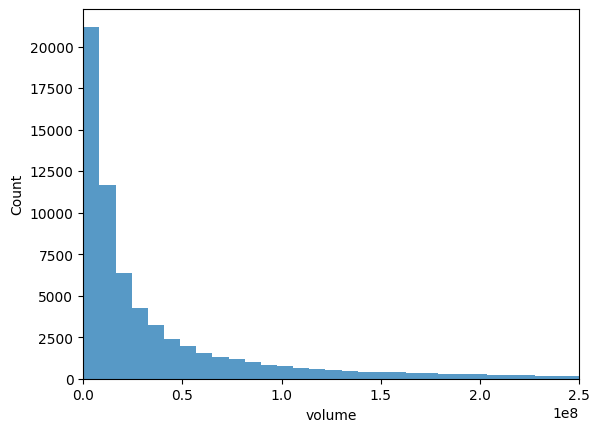

In [15]:
sns.histplot(std_query_df["volume"], bins=20000)
plt.xlim(0, 0.025 * 10**10)
plt.show()

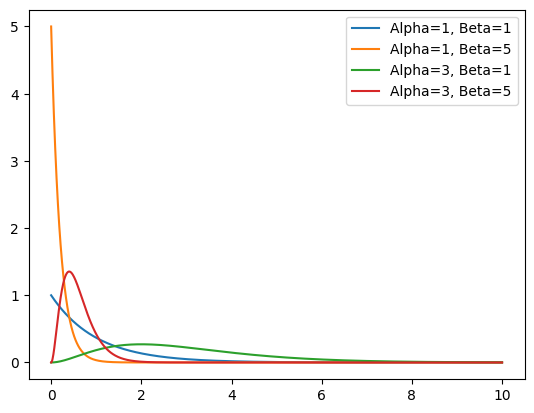

In [16]:
alpha_values = [1, 3]
beta_values = [1, 5]

x = np.linspace(0, 10, 1000)

for alpha in alpha_values:
    for beta in beta_values:
        pdf = stats.gamma.pdf(x, a=alpha, scale=1 / beta)

        label = f"Alpha={alpha}, Beta={beta}"
        plt.plot(x, pdf, label=label)
plt.legend()
plt.show()

In [17]:
np.random.seed(400)
coins_id_query = """
    SELECT coins.id
    FROM coins
"""
coins_id = pd.read_sql(coins_id_query, engine)["id"].tolist()
random_id = np.random.choice(coins_id, size=40, replace=False)

query_avg_volume = """
    SELECT AVG(volume) as average_volume
    FROM daily_market
    WHERE c_id IN ({})
    GROUP BY c_id
""".format(
    ",".join(str(id) for id in random_id)
)

avg_volumes = pd.read_sql(query_avg_volume, engine)
avg_volumes

,average_volume
0,2.042831e+08
1,2.404920e+07
2,1.831891e+06
3,9.538200e+07
4,5.100532e+09
5,9.934367e+07
6,2.697569e+08
7,2.193400e+07
8,4.659560e+06
9,8.312850e+07


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color='crimson' size=7>
            Normal Distribution vs. t-Distribution
        </font>
		<p></p>
		<hr>
         For calculating a confidence interval for the mean, we can make use of the normal distribution. Furthermore, given our substantial sample size, the application of the t-distribution, which approaches the normal distribution, is also appropriate (Degrees of Freedom = 39).
        <br />
	</font>
</div>

In [18]:
population_std = avg_volumes["average_volume"].std()

sample_data = avg_volumes["average_volume"]
sample_size = len(avg_volumes)

confidence_level = 0.98

critical_value = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = critical_value * (population_std / np.sqrt(sample_size))

sample_mean = np.mean(sample_data)
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

interval_length_normal = confidence_interval[1] - confidence_interval[0]

print("sample mean:", sample_mean)
print("confidence interval:", confidence_interval)
print("confidence interval len:", interval_length_normal)

sample mean: 177742276.88260546
confidence interval: (-116849913.57193783, 472334467.3371488)
confidence interval len: 589184380.9090866


In [19]:
ci = np.mean(avg_volumes["average_volume"]) + (
    (np.array(stats.norm.interval(0.98)) * avg_volumes["average_volume"].std())
    / np.sqrt(40)
)
print(f"We are 98% sure that the true mean lies between {ci[0]:6f} and {ci[1]:6f}")

We are 98% sure that the true mean lies between -116849913.571938 and 472334467.337149


In [20]:
degrees_of_freedom = sample_size - 1

critical_value = stats.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

margin_of_error = critical_value * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

interval_length_t = confidence_interval[1] - confidence_interval[0]

print("sample mean:", sample_mean)
print("confidence interval:", confidence_interval)
print("confidence interval len:", interval_length_t)

sample mean: 177742276.88260546
confidence interval: (-129449069.073769, 484933622.83897996)
confidence interval len: 614382691.9127489


In [21]:
interval_length_normal / interval_length_t

0.9589859686228908

<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=5>
         As it's evident, both answers are remarkably close. However, because the t-distribution approximates the normal distribution and may not always align precisely, opting for the normal distribution offers a slightly more accurate approach.
	</font>
</div>